In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-5d8jimrl
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-5d8jimrl
  Resolved https://github.com/facebookresearch/detectron2.git to commit dc9ad7055b48f25ab0a13e817c1a427b1385f98a
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 637.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 733.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 5.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=b2023ca5bf08763ad3f5ae93d85747525c2ba9c2ae6899ebffab95b8885e06b6
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypar

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random

from roboflow import Roboflow

from detectron2.utils.logger import setup_logger
setup_logger()


from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog
from detectron2.data.datasets import register_coco_instances

from detectron2.data import build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
VERSION = 16
rf = Roboflow(api_key="ZhI7A2zsdYwwdxfsww5z")
project = rf.workspace("qroup-b").project("detection-equation-and-solving-equation")
dataset = project.version(VERSION).download("coco")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to detection-equation--and-solving-equation-16 in coco:: 100%|██████████| 215/215 [00:00<00:00, 2034.03it/s]


In [ ]:
register_coco_instances("my_train", {}, f"./detection-equation--and-solving-equation-{VERSION}/train/_annotations.coco.json", f"./detection-equation--and-solving-equation-{VERSION}/train/")
register_coco_instances("my_valid", {}, f"./detection-equation--and-solving-equation-{VERSION}/valid/_annotations.coco.json", f"./detection-equation--and-solving-equation-{VERSION}/valid/")
register_coco_instances("my_test", {}, f"./detection-equation--and-solving-equation-{VERSION}/test/_annotations.coco.json", f"./detection-equation--and-solving-equation-{VERSION}/test/")

In [ ]:
Equation_train_metadata = MetadataCatalog.get('my_train')

In [ ]:
dataset_dic = DatasetCatalog.get('my_train')

WARNING [02/05 14:26:24 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[02/05 14:26:24 d2.data.datasets.coco]: Loaded 192 images in COCO format from ./detection-equation--and-solving-equation-16/train/_annotations.coco.json


In [ ]:
Equation_train_metadata

Metadata(evaluator_type='coco', image_root='./detection-equation--and-solving-equation-16/train/', json_file='./detection-equation--and-solving-equation-16/train/_annotations.coco.json', name='my_train', thing_classes=['equation', '2', '4', '6', 'arrow', 'minus', 'plus'], thing_dataset_id_to_contiguous_id={0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6})

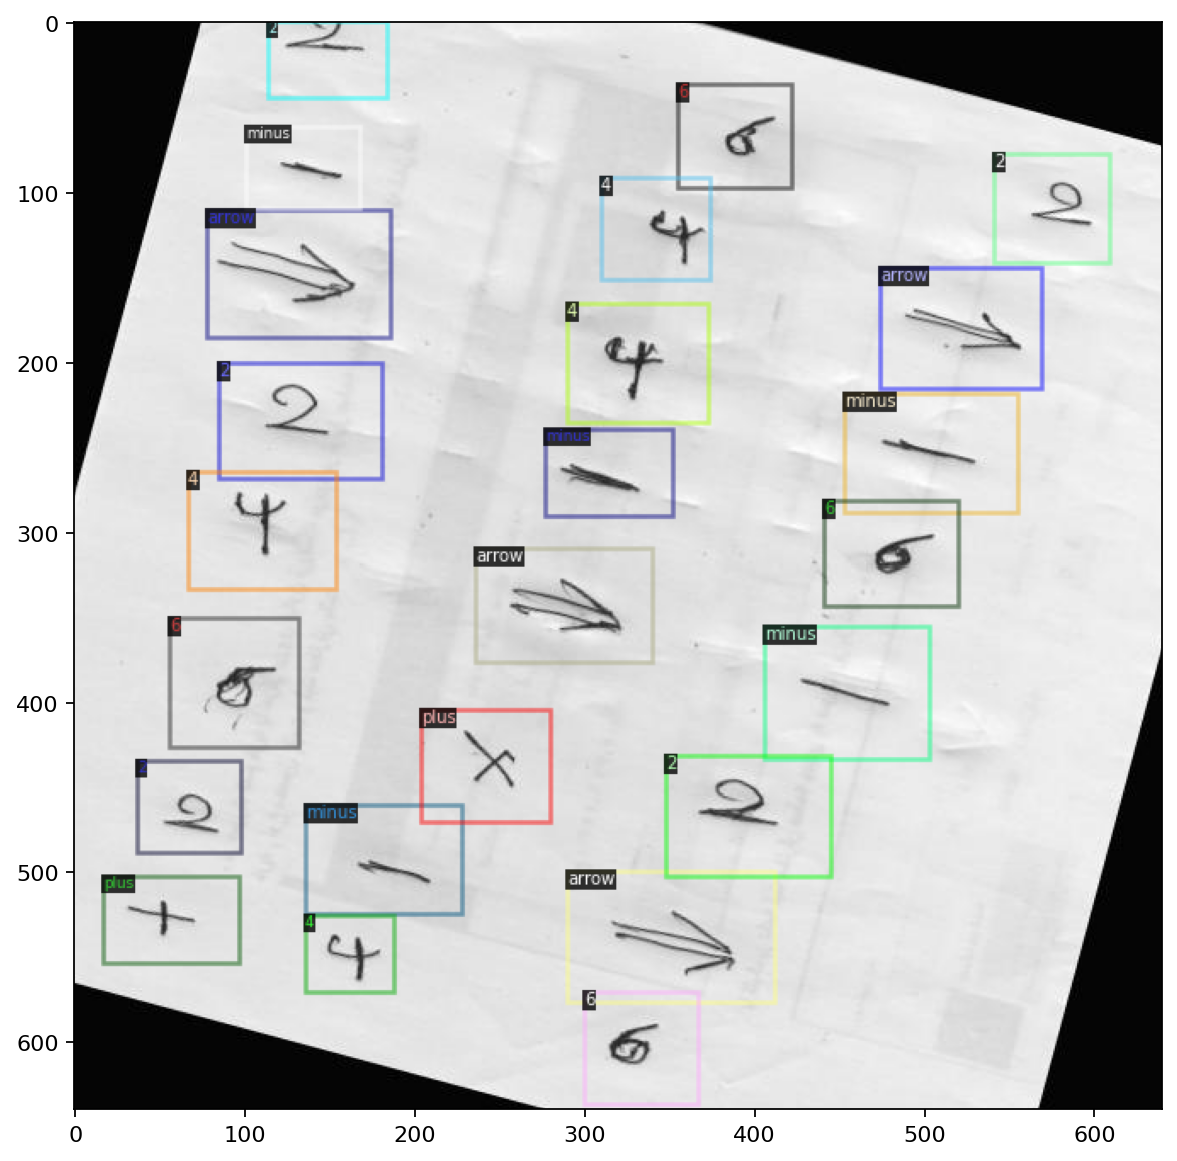

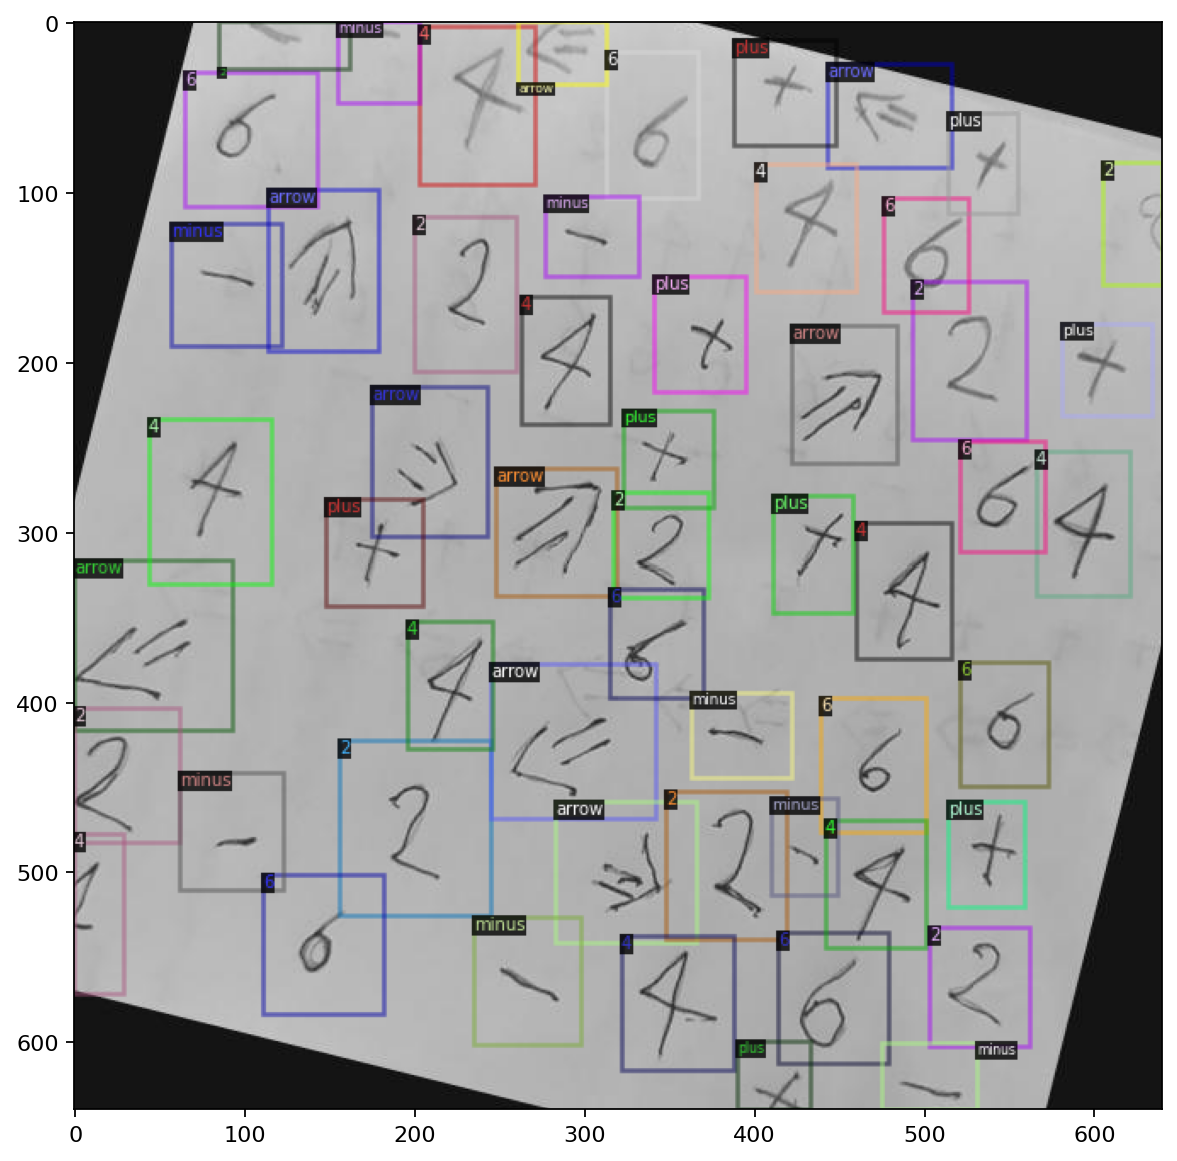

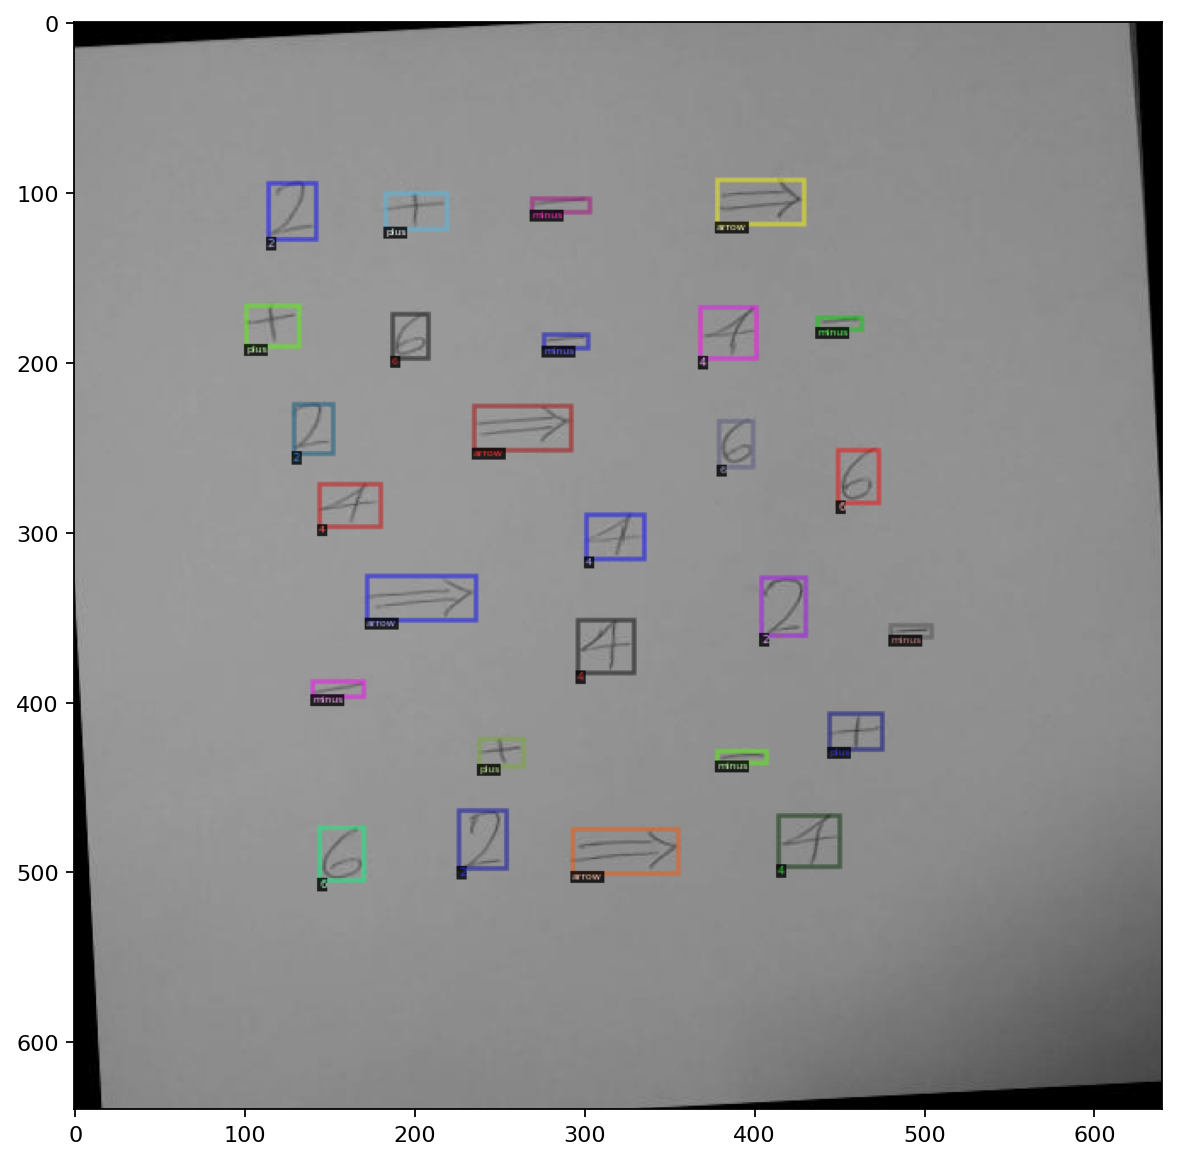

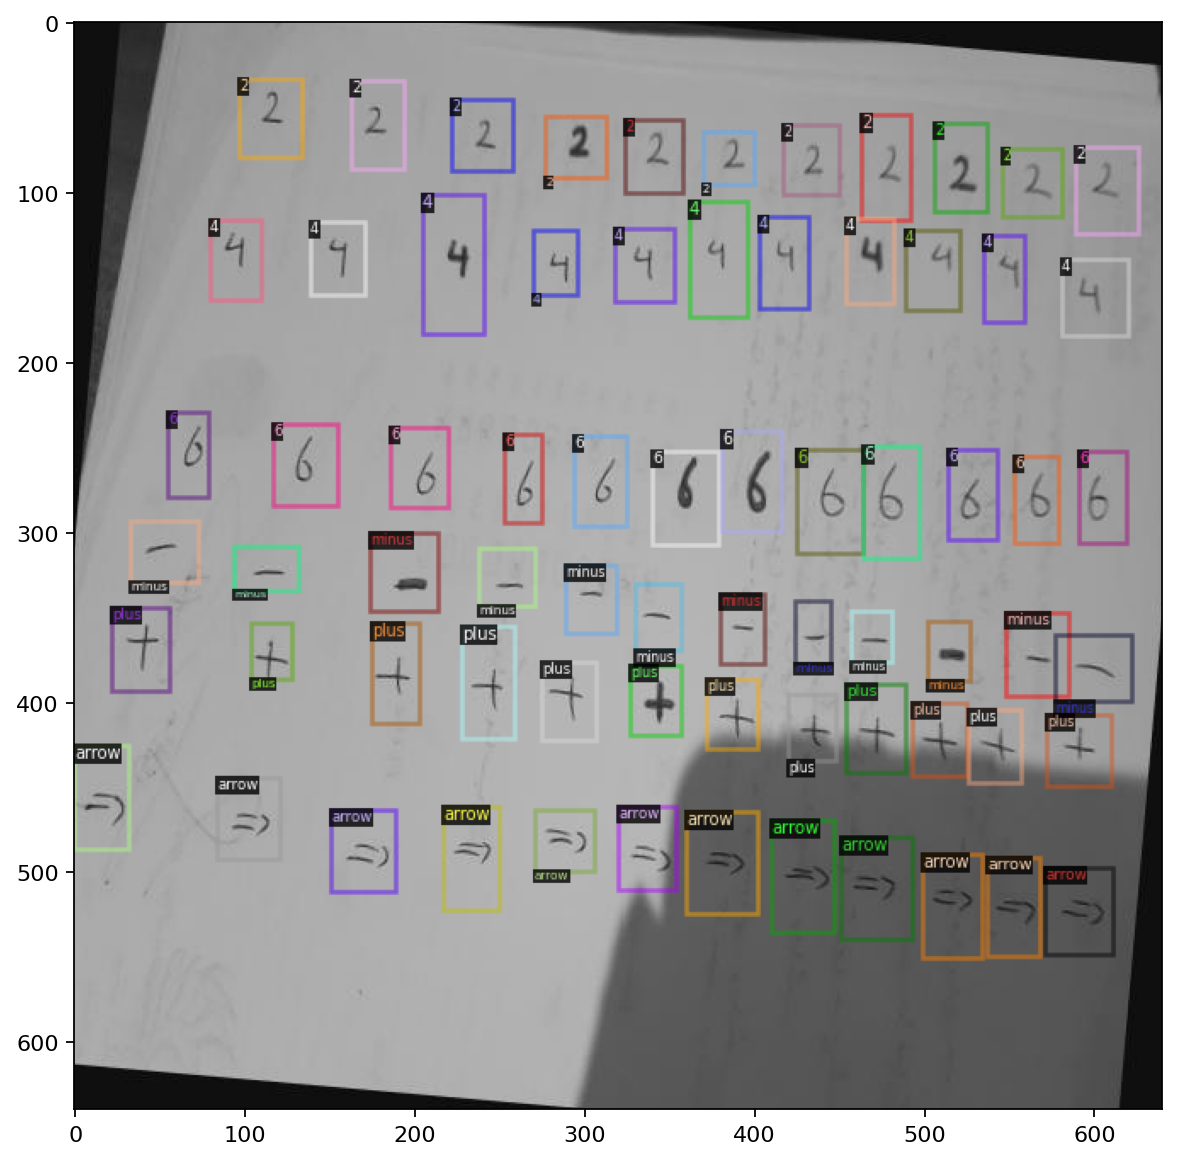

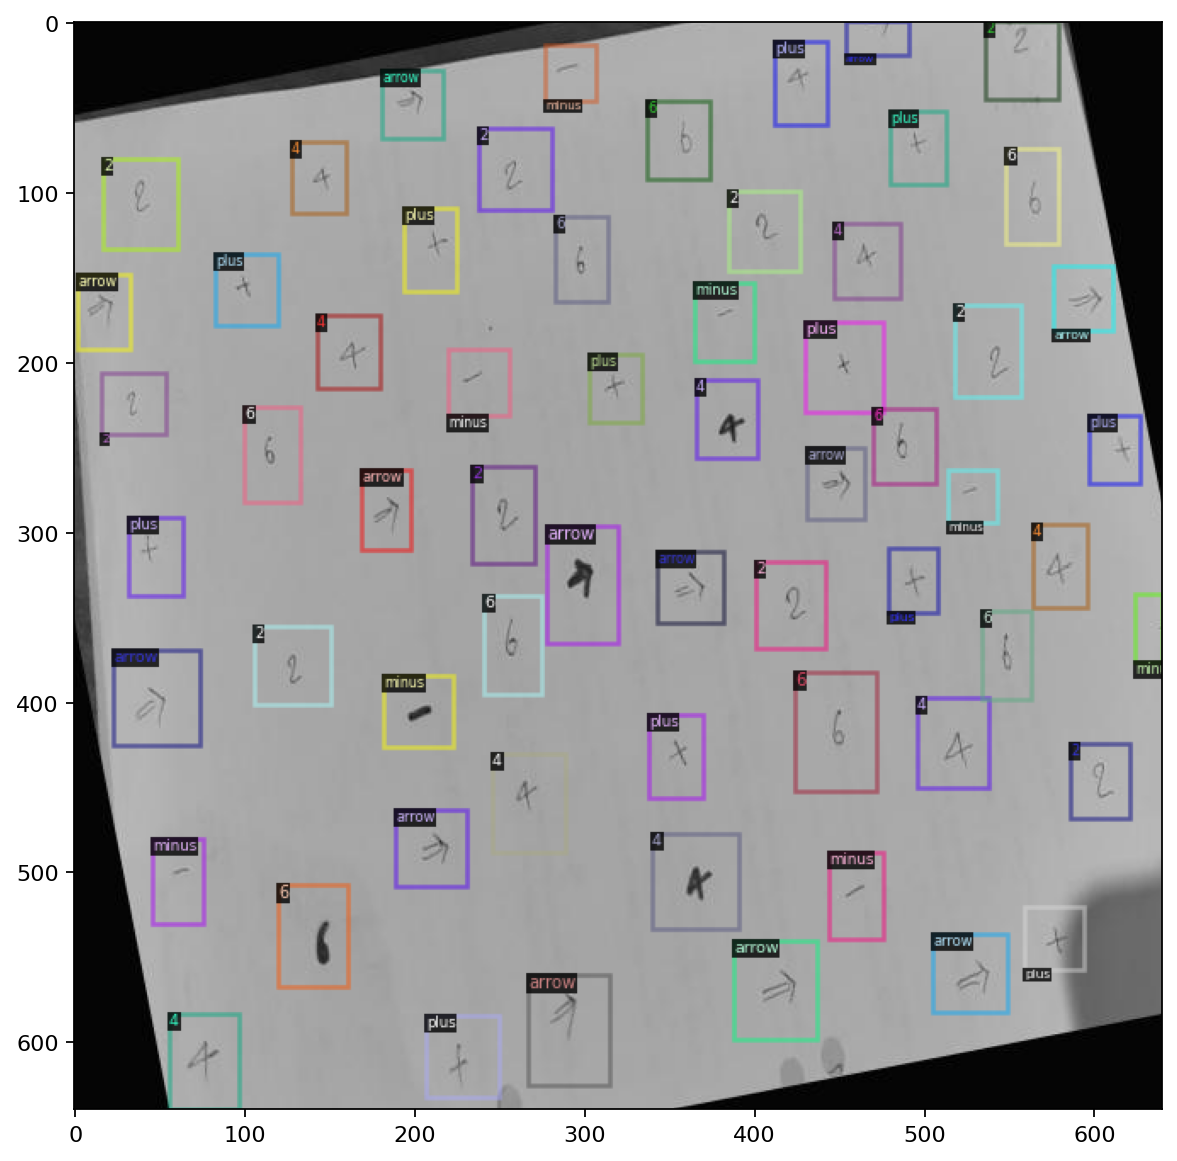

In [ ]:
from detectron2.utils import visualizer
for d in random.sample(dataset_dic,5):
  plt.figure(figsize = (9,9) , dpi=160)
  img = cv2.imread(d["file_name"])
  visualizer = Visualizer(img[:,:,::],metadata=Equation_train_metadata , scale = 1)
  vis = visualizer.draw_dataset_dict(d)
  plt.imshow(vis.get_image()[:,:,::])
  plt.show()

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class COCOTrainer(DefaultTrainer):
  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):
    if output_folder is None:
      os.makedirs('coco_eval' , exist_ok=True)
      output_folder = 'coco_eval'
    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_DC5_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_train",)
cfg.DATASETS.TEST = ("my_valid",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_DC5_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 4
# cfg.MODEL.DEVICE='cpu'
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 2000
cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 7

In [ ]:
trainer = COCOTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[02/04 07:37:46 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


[02/04 07:37:49 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_DC5_3x/137849425/model_final_68d202.pkl ...


model_final_68d202.pkl: 663MB [02:21, 4.67MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[02/04 07:40:13 d2.engine.train_loop]: Starting training from iteration 0


This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)


[02/04 07:40:44 d2.utils.events]:  eta: 0:33:18  iter: 19  total_loss: 2.596  loss_cls: 1.496  loss_box_reg: 0.7544  loss_rpn_cls: 0.2404  loss_rpn_loc: 0.1237  time: 1.0446  data_time: 0.0351  lr: 0.00039962  max_mem: 4560M
[02/04 07:41:06 d2.utils.events]:  eta: 0:34:02  iter: 39  total_loss: 1.744  loss_cls: 0.7899  loss_box_reg: 0.7535  loss_rpn_cls: 0.05223  loss_rpn_loc: 0.09467  time: 1.0820  data_time: 0.0189  lr: 0.00079922  max_mem: 4560M
[02/04 07:41:29 d2.utils.events]:  eta: 0:35:05  iter: 59  total_loss: 1.559  loss_cls: 0.6922  loss_box_reg: 0.7462  loss_rpn_cls: 0.02589  loss_rpn_loc: 0.0873  time: 1.1034  data_time: 0.0202  lr: 0.0011988  max_mem: 4560M
[02/04 07:41:52 d2.utils.events]:  eta: 0:34:55  iter: 79  total_loss: 1.414  loss_cls: 0.623  loss_box_reg: 0.6942  loss_rpn_cls: 0.02734  loss_rpn_loc: 0.06927  time: 1.1119  data_time: 0.0225  lr: 0.0015984  max_mem: 4560M
[02/04 07:42:14 d2.utils.events]:  eta: 0:34:00  iter: 99  total_loss: 1.159  loss_cls: 0.4627 

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


[02/04 08:18:13 d2.evaluation.evaluator]: Inference done 11/11. Dataloading: 0.0008 s/iter. Inference: 0.1696 s/iter. Eval: 0.0003 s/iter. Total: 0.1706 s/iter. ETA=0:00:00
[02/04 08:18:13 d2.evaluation.evaluator]: Total inference time: 0:00:01.156097 (0.192683 s / iter per device, on 1 devices)
[02/04 08:18:13 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.169555 s / iter per device, on 1 devices)
[02/04 08:18:13 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/04 08:18:13 d2.evaluation.coco_evaluation]: Saving results to coco_eval/coco_instances_results.json
[02/04 08:18:13 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/04 08:18:13 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/04 08:18:13 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.05 seconds.
[02/04 08:18:13 d2.evaluation

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join( '/content/gdrive/MyDrive/', 'model_final.pth')

In [ ]:
cfg.DATASETS.TEST = ("my_test",)

In [ ]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

In [ ]:
predictor = DefaultPredictor(cfg)

[02/05 14:26:59 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/gdrive/MyDrive/model_final.pth ...


In [ ]:
Equation_test_metadata = MetadataCatalog.get('my_test')

In [ ]:
Equation_test_metadata

Metadata(evaluator_type='coco', image_root='./detection-equation--and-solving-equation-16/test/', json_file='./detection-equation--and-solving-equation-16/test/_annotations.coco.json', name='my_test')

In [ ]:
evaluator = COCOEvaluator("my_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_test")

inference_on_dataset(predictor.model, val_loader, evaluator)

WARNING [02/04 08:18:57 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [02/04 08:18:57 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[02/04 08:18:57 d2.data.datasets.coco]: Loaded 5 images in COCO format from ./detection-equation--and-solving-equation-16/test/_annotations.coco.json
[02/04 08:18:57 d2.data.build]: Distribution of instances among all 7 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|  equation  | 0            |     2      | 37           |     4      | 31           |
|     6      | 39           |   arrow    | 34           |   minus    | 40           |
|    plus    | 37           |            |              |            |              |
|   total    | 218          | 

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


[02/04 08:18:58 d2.evaluation.evaluator]: Total inference time: 0:00:00.320785 (0.320785 s / iter per device, on 1 devices)
[02/04 08:18:58 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.160633 s / iter per device, on 1 devices)
[02/04 08:18:58 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[02/04 08:18:58 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[02/04 08:18:58 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[02/04 08:18:58 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[02/04 08:18:58 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.01 seconds.
[02/04 08:18:58 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[02/04 08:18:58 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.02 seconds.
 Average Precision  (AP)

OrderedDict([('bbox',
              {'AP': 40.77154470629993,
               'AP50': 80.49675277666915,
               'AP75': 38.14577600051417,
               'APs': 39.33198316604168,
               'APm': 58.40827808473633,
               'APl': nan,
               'AP-equation': nan,
               'AP-2': 44.58967655485348,
               'AP-4': 43.68706661604424,
               'AP-6': 43.44946334003089,
               'AP-arrow': 64.90606521674202,
               'AP-minus': 13.77913915829364,
               'AP-plus': 34.217857351835285})])

torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)


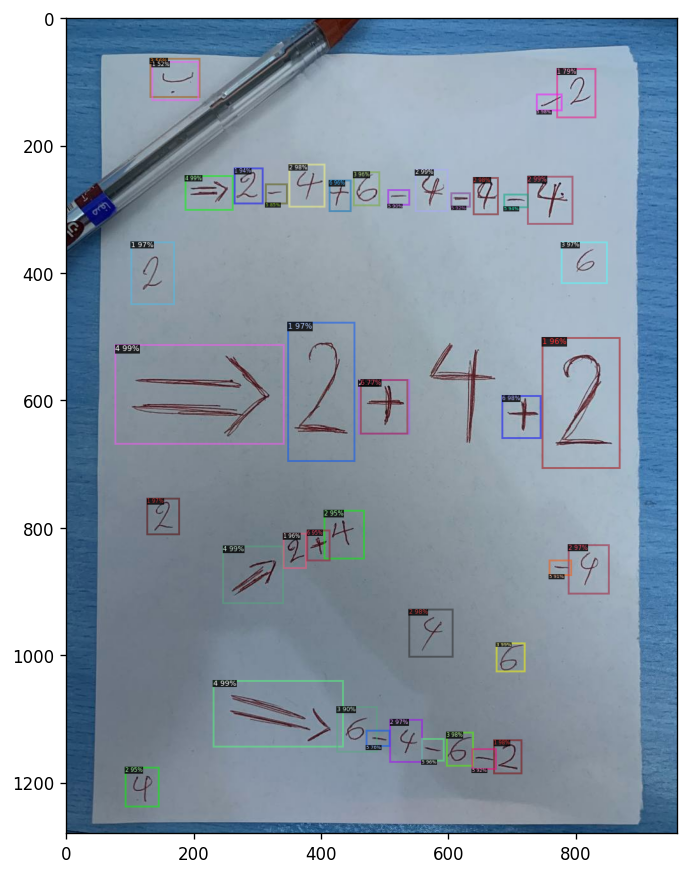

In [ ]:
from detectron2.utils.visualizer import ColorMode
import glob

img = cv2.imread('Untitled2.jpg')
output = predictor(img)
v = Visualizer(img,metadata=Equation_test_metadata , scale = 1)
out = v.draw_instance_predictions(output["instances"].to("cpu"))
plt.figure(figsize = (9,9) , dpi=120)
plt.imshow(out.get_image())
plt.show()

In [ ]:
output

{'instances': Instances(num_instances=42, image_height=1280, image_width=960, fields=[pred_boxes: Boxes(tensor([[  77.3089,  514.3312,  340.4965,  669.3516],
         [ 246.3388,  830.0474,  339.9158,  919.4290],
         [ 187.1390,  248.5346,  260.7019,  301.5563],
         [ 724.3267,  250.1652,  793.8049,  324.3989],
         [ 547.6803,  239.3516,  598.1539,  303.6541],
         [ 230.8436, 1040.5322,  434.4248, 1143.8474],
         [ 674.7495,  981.5324,  719.2377, 1025.7992],
         [ 349.7920,  231.5076,  405.4029,  297.2257],
         [ 671.2693, 1134.2478,  713.5444, 1186.3557],
         [ 738.4482,  121.4116,  776.8152,  146.4704],
         [ 537.6265,  929.4831,  605.6907, 1003.2382],
         [ 639.4524,  251.5601,  676.5062,  309.4923],
         [ 597.0610, 1122.2045,  637.8852, 1174.2737],
         [ 684.3032,  594.0511,  743.5781,  659.5576],
         [ 777.0349,  353.3342,  847.6903,  417.5045],
         [ 787.5817,  827.5540,  850.9597,  903.8138],
         [ 127.23

In [ ]:
boxes = np.array(output['instances'].__getattr__('pred_boxes').to("cpu"))
pred_classes = np.array(output['instances'].__getattr__('pred_classes').to("cpu"))

The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
equations = []
for i,c in enumerate(pred_classes):
  print(c)
  if(c == 4):
    equations.append(i)

4
4
4
2
2
4
3
2
1
5
2
2
3
6
3
2
1
1
2
1
1
3
1
5
6
6
2
2
5
1
5
5
5
3
5
5
1
6
5
3
2
1


In [ ]:
data = []
for x,y in zip(boxes,pred_classes):
    data.append([np.array(x).tolist(),y])

In [ ]:
eqs = []
for i in equations:
    eqs.append(data[i])

In [ ]:
data.sort()

In [ ]:
import math
for box in data:
    if(box[1] != 4):
        eq_num = -1
        dis_min = 1000
        i = 0
        for eq in eqs:
            dis = math.sqrt(math.pow(eq[0][2] - box[0][0] , 2)+math.pow(eq[0][1] - box[0][1] , 2))
            if(dis < dis_min):
                dis_min = dis
                eq_num = i
            i += 1
        eqs[eq_num].append(box[1])
        eqs[eq_num][0][2] = box[0][2]
        eqs[eq_num][0][1] = min(eqs[eq_num][0][1] , box[0][1])
        eqs[eq_num][0][3] = max(eqs[eq_num][0][3] , box[0][3])



In [ ]:
res = []
for eq in eqs:
    ans = 0
    sign = 1
    for i in range(1,len(eq)):
        if(eq[i] == 5):
            sign = -1
        elif(eq[i] <= 3):
            ans += sign * 2*eq[i]
            sign = 1

    res.append([eq[0] , ans])
res

[[[77.30889129638672, 250.1651611328125, 847.6903076171875, 707.0428466796875],
  10],
 [[246.33880615234375, 755.2276611328125, 466.9841613769531, 919.428955078125],
  8],
 [[187.1390380859375, 64.73825073242188, 830.0140380859375, 449.83349609375],
  4],
 [[230.84364318847656, 827.553955078125, 850.9596557617188, 1238.486328125],
  4]]